In [4]:
#We are repeating the SVR experiment with the same data but splitting the test and train data manually to ensure we only use the suggested data as test data.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#load the data
filepath = r"C:\Users\Admin\Machine Learning Fundamentals\CSV_files\MLData2.xlsx"
df = pd.read_excel(filepath)

#split the data into features variables and target variable
df = df.drop(columns=['DA concentration'])
X = df.drop(columns=['DA Concentration (uM)'])
y = df['DA Concentration (uM)']

#for our train test split we want to manually choose only part of data that was suggested
test_indices = list(range(43,48))
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]


In [5]:
X_test.head()

,AA Concentration (uM),Peak Current (uA),Peak Potential (mV),Peak Area (uC)
43,0,8.123,60.585,16.010
44,300,21.614,174.853,112.173
45,50,40.852,167.246,126.391
46,400,55.129,230.827,254.973
47,300,32.599,143.477,118.396


In [6]:
#create a training set out of all remaining data
X_train = X.drop(test_indices)
y_train = y.drop(test_indices)
X_train.head()

,AA Concentration (uM),Peak Current (uA),Peak Potential (mV),Peak Area (uC)
0,0,0.000,0.000,0.000
1,0,2.333,34.772,3.916
2,0,3.090,41.093,5.268
3,0,5.199,47.659,8.317
4,0,17.519,77.535,37.677


In [7]:
#Training and Testing Part using Scikit-Learn
# Standarize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr_model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 2464.8462
R^2 Score: 0.4642


In [ ]:
# Initialize and train the SVR model with different hyperparameters
svr_model2 = SVR(kernel='rbf', C=100, gamma='auto', epsilon=1.0)
svr_model2.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr_model2.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 16814.7054
R^2 Score: -2.6554


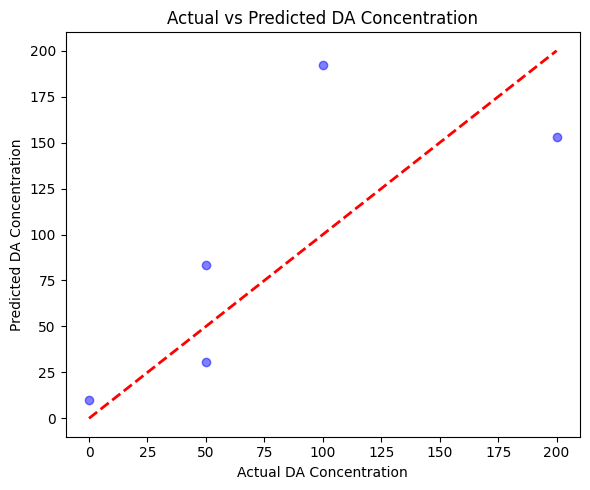

In [8]:
# Plot actual vs predicted values
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual DA Concentration')
plt.ylabel('Predicted DA Concentration')
plt.title('Actual vs Predicted DA Concentration')
plt.tight_layout()
plt.show()

In [10]:
# Example of making a new prediction -- feature variables are given below in same format as the training data
new_data = pd.DataFrame({
    'AA Concentration (uM)': [600],
    'Peak Current (uA)': [50.852],
    'Peak Potential (mV)': [169.792],
    'Peak Area (uC)': [374.676]
})

#standarize the new data
new_data_scaled = scaler.transform(new_data)

# let's make a prediction with given feature variables
prediction = svr_model.predict(new_data_scaled)
print(f"Predicted DA Concentration: {prediction[0]:.4f}")

Predicted DA Concentration: 122.2622


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5, 1.0]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'C': 100, 'epsilon': 1.0, 'gamma': 'auto'}


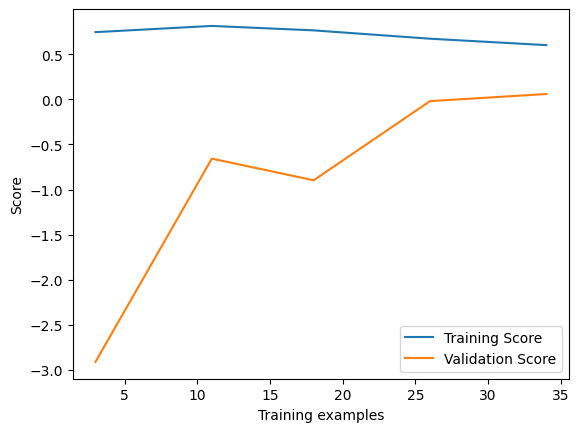

In [11]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(svr_model, X_train_scaled, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()